In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from a5_utils import *

# Exercise 3

In [8]:
temp = cv2.imread('data/epipolar/house1.jpg') # 0-255
temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
temp = temp.astype(np.float64) / 255
temp2 = cv2.imread('data/epipolar/house2.jpg') # 0-255
temp2 = cv2.cvtColor(temp2, cv2.COLOR_BGR2GRAY)
temp2 = temp2.astype(np.float64) / 255
data = np.loadtxt("data/epipolar/house_points.txt")
P1 = np.loadtxt("data/epipolar/house1_camera.txt")
P2 = np.loadtxt("data/epipolar/house2_camera.txt")
print(data)
print(P1)
print(P2)

[[192.20093   44.911215 190.1112    46.260498]
 [323.19159   64.051402 296.41291   68.954121]
 [132.38785   68.836449 143.52955   67.162519]
 [313.02336  112.5      285.6633   120.31337 ]
 [103.67757  110.10748  111.87792  104.78616 ]
 [277.13551  170.51869  238.48445  176.45023 ]
 [ 87.528037 153.1729   102.32271  144.7986  ]
 [275.93925  245.88318  239.67885  256.47512 ]
 [321.3972   209.99533  311.34292  225.42068 ]
 [281.32243  192.64953  243.85925  199.74106 ]]
[[ 1.6108033e+01  1.3704159e+01 -6.7351564e+01 -1.8838024e+02]
 [ 8.2886212e-01 -6.1257005e+01 -2.7985739e+01 -7.4190016e+00]
 [ 1.6739784e-01 -4.5720139e-02 -8.4811075e-02  5.6548906e-01]]
[[ 1.0571624e+01  4.0812730e+00 -2.2538413e+01 -5.9593366e+01]
 [ 3.1827253e-01 -2.1616617e+01 -9.8820962e+00 -2.7146868e+00]
 [ 6.1142503e-02 -2.0656640e-02 -2.0701037e-02  2.5211789e-01]]


In [53]:
points = np.array([])
A = np.array([])
for d in data:
    x1 = d[0:2]
    x2 = d[2:4]
    x1x = np.array([[0, -1, x1[1]], [1, 0, -x1[0]], [-x1[1], x1[0], 0]])
    x2x = np.array([[0, -1, x2[1]], [1, 0, -x2[0]], [-x2[1], x2[0], 0]])
    a1 = np.matmul(x1x, P1)[0:2, :]
    a2 = np.matmul(x2x, P2)[0:2, :]
    A = a1
    A = np.vstack((A, a2))
    U, D, VT = np.linalg.svd(A)
    x = VT.T[:,-1] / VT[-1,-1]
    if points.size == 0:
        points = x
    else:
        points = np.vstack((points, x))
        
print(points)



[[-0.09166688  1.54113218 -5.11130385  1.        ]
 [-1.88807782  1.93602158 -6.11569419  1.        ]
 [ 0.99410415  0.74757258 -4.53449655  1.        ]
 [-1.93040713  1.41271217 -6.26803211  1.        ]
 [ 0.59865299 -0.0197476  -4.23708094  1.        ]
 [-2.17552195  0.6922716  -5.95135797  1.        ]
 [ 1.17866644 -1.09147294 -4.26309857  1.        ]
 [-2.26557196 -0.19020358 -6.4001194   1.        ]
 [-1.55759405  0.10608691 -7.69230933  1.        ]
 [-2.20802126  0.46724741 -6.13054434  1.        ]]


[ 0.09166688 -5.11130385 -1.54113218]
[ 1.88807782 -6.11569419 -1.93602158]
[-0.99410415 -4.53449655 -0.74757258]
[ 1.93040713 -6.26803211 -1.41271217]
[-0.59865299 -4.23708094  0.0197476 ]
[ 2.17552195 -5.95135797 -0.6922716 ]
[-1.17866644 -4.26309857  1.09147294]
[ 2.26557196 -6.4001194   0.19020358]
[ 1.55759405 -7.69230933 -0.10608691]
[ 2.20802126 -6.13054434 -0.46724741]


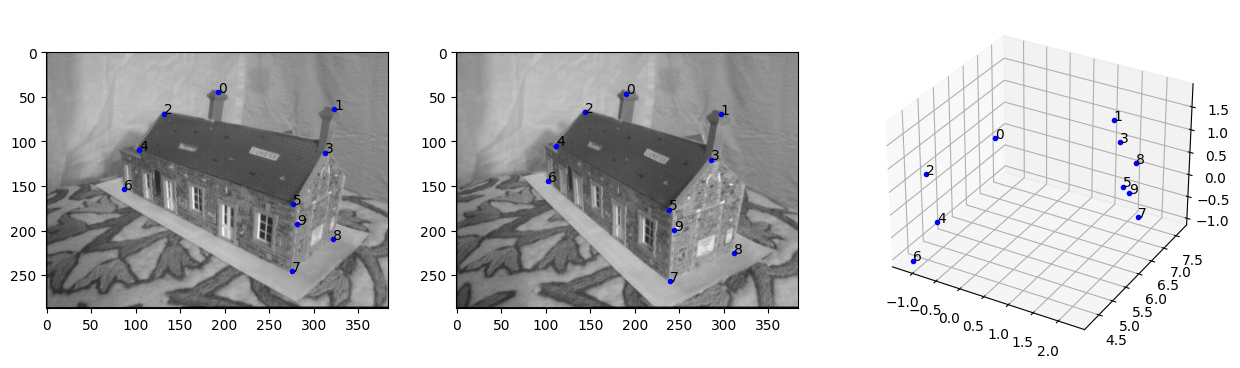

In [83]:
f = plt.figure(figsize=(15, 10))
f.add_subplot(1, 3, 1)
plt.imshow(temp, cmap='gray')

for i, d in enumerate(data):
    x1 = d[0]
    y1 = d[1]
    plt.plot(x1, y1, 'bo', markersize=3)
    plt.text(x1, y1, i)

f.add_subplot(1, 3, 2)
plt.imshow(temp2, cmap="gray")

for i, d in enumerate(data):
    x1 = d[2]
    y1 = d[3]
    plt.plot(x1, y1, 'bo', markersize=3)
    plt.text(x1, y1, i)

ax = f.add_subplot(1, 3, 3, projection = '3d')

T = np.array([[-1, 0, 0], [0, 0, 1], [0, -1, 0]])

for i, d in enumerate(points):
    d = T.dot(d[0:3])
    print(d)
    x1 = d[0]
    y1 = -d[1]
    z1 = -d[2]
    ax.plot(x1, y1, z1, 'bo', markersize=3)
    ax.text(x1, y1, z1, s = i)

plt.show()